In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('../data/raw/drug_deaths.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5105 non-null   int64  
 1   ID                   5105 non-null   object 
 2   Date                 5103 non-null   object 
 3   DateType             5103 non-null   float64
 4   Age                  5102 non-null   float64
 5   Sex                  5099 non-null   object 
 6   Race                 5092 non-null   object 
 7   ResidenceCity        4932 non-null   object 
 8   ResidenceCounty      4308 non-null   object 
 9   ResidenceState       3556 non-null   object 
 10  DeathCity            5100 non-null   object 
 11  DeathCounty          4005 non-null   object 
 12  Location             5081 non-null   object 
 13  LocationifOther      590 non-null    object 
 14  DescriptionofInjury  4325 non-null   object 
 15  InjuryPlace          5039 non-null   o

In [176]:
#Drop columns not needed in the analysis or with many null values
df1 = df1.drop(['Unnamed: 0','DateType','COD','ResidenceCity','ResidenceCounty', 'ResidenceState','DeathCity',
               'DeathCounty','Location','LocationifOther','DescriptionofInjury','InjuryPlace','InjuryCity',
              'InjuryCounty','InjuryState','OtherSignifican', 'Other','DeathCityGeo','ResidenceCityGeo',
              'InjuryCityGeo'],axis = 1)

#Rename with the full drug name
df1 = df1.rename(columns={"Amphet": "Amphetamine", "Tramad": "Tramadol"})

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5105 non-null   object 
 1   Date                5103 non-null   object 
 2   Age                 5102 non-null   float64
 3   Sex                 5099 non-null   object 
 4   Race                5092 non-null   object 
 5   Heroin              5105 non-null   int64  
 6   Cocaine             5105 non-null   int64  
 7   Fentanyl            5105 non-null   object 
 8   Fentanyl_Analogue   5105 non-null   float64
 9   Oxycodone           5105 non-null   int64  
 10  Oxymorphone         5105 non-null   int64  
 11  Ethanol             5105 non-null   int64  
 12  Hydrocodone         5105 non-null   int64  
 13  Benzodiazepine      5105 non-null   int64  
 14  Methadone           5105 non-null   int64  
 15  Amphetamine         5105 non-null   int64  
 16  Tramad

In [177]:
df1 =  df1.assign(Date = pd.to_datetime(df1["Date"]))
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5080 entries, 1 to 5104
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  5080 non-null   object        
 1   Date                5080 non-null   datetime64[ns]
 2   Age                 5080 non-null   float64       
 3   Sex                 5080 non-null   object        
 4   Race                5080 non-null   object        
 5   Heroin              5080 non-null   int64         
 6   Cocaine             5080 non-null   int64         
 7   Fentanyl            5080 non-null   object        
 8   Fentanyl_Analogue   5080 non-null   float64       
 9   Oxycodone           5080 non-null   int64         
 10  Oxymorphone         5080 non-null   int64         
 11  Ethanol             5080 non-null   int64         
 12  Hydrocodone         5080 non-null   int64         
 13  Benzodiazepine      5080 non-null   int64       

In [178]:
 df1.drop_duplicates(['ID'])

,ID,Date,Age,Sex,Race,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,...,Hydrocodone,Benzodiazepine,Methadone,Amphetamine,Tramadol,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
1,13-0102,2013-03-21,48.0,Male,Black,0,1,0,0.0,0,...,0,0,0,0,0,0,0,0,0,Accident
2,16-0165,2016-03-13,30.0,Female,White,1,1,0,0.0,0,...,0,0,0,0,0,0,0,0,1,Accident
3,16-0208,2016-03-31,23.0,Male,White,1,0,1,0.0,0,...,0,0,0,0,0,0,0,0,1,Accident
4,13-0052,2013-02-13,22.0,Male,"Asian, Other",0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,Accident
5,14-0277,2014-06-29,23.0,Male,White,1,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,Accident
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,15-0466,2015-09-08,43.0,Male,White,0,0,0,0.0,0,...,0,1,0,0,0,0,0,0,0,Accident
5101,17-0618,2017-07-22,21.0,Male,White,1,0,0,0.0,0,...,0,1,0,0,0,0,0,0,0,Accident
5102,18-0646,2018-08-14,30.0,Male,White,1,0,1,1.0,0,...,0,0,0,0,1,0,0,0,1,Accident
5103,14-0124,2014-03-16,33.0,Male,White,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,Accident


In [179]:
df1 = df1.astype({'Age': 'int64', 'Fentanyl_Analogue': 'int64'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5080 entries, 1 to 5104
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  5080 non-null   object        
 1   Date                5080 non-null   datetime64[ns]
 2   Age                 5080 non-null   int64         
 3   Sex                 5080 non-null   object        
 4   Race                5080 non-null   object        
 5   Heroin              5080 non-null   int64         
 6   Cocaine             5080 non-null   int64         
 7   Fentanyl            5080 non-null   object        
 8   Fentanyl_Analogue   5080 non-null   int64         
 9   Oxycodone           5080 non-null   int64         
 10  Oxymorphone         5080 non-null   int64         
 11  Ethanol             5080 non-null   int64         
 12  Hydrocodone         5080 non-null   int64         
 13  Benzodiazepine      5080 non-null   int64       

In [180]:
err1 = pd.isnull(pd.to_numeric(df1['Fentanyl'], errors='coerce'))
err2 = pd.isnull(pd.to_numeric(df1['Morphine_NotHeroin'], errors='coerce'))
err3 = pd.isnull(pd.to_numeric(df1['AnyOpioid'], errors='coerce'))
df1[err1]

,ID,Date,Age,Sex,Race,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,...,Hydrocodone,Benzodiazepine,Methadone,Amphetamine,Tramadol,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
507,15-0639,2015-11-17,49,Male,"Hispanic, White",1,1,1-A,0,0,...,0,0,0,0,0,0,0,0,1,Accident
2808,12-0171,2012-07-03,67,Male,White,0,0,1 POPS,0,1,...,0,1,0,0,0,0,0,0,0,Accident
3741,13-0134,2013-04-17,58,Female,White,0,0,1 (PTCH),0,0,...,0,1,0,0,0,0,0,0,0,Accident
3801,15-0637,2015-11-16,56,Female,White,1,0,1-A,0,0,...,0,1,0,1,0,0,0,0,1,Accident


In [182]:
df1[err2]

,ID,Date,Age,Sex,Race,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,...,Hydrocodone,Benzodiazepine,Methadone,Amphetamine,Tramadol,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
62,18-0008,2018-01-04,42,Male,White,0,0,0,0,0,...,0,1,0,0,0,1ES,0,0,1,Accident
583,15-0660,2015-11-23,28,Male,White,0,0,1,0,0,...,0,1,0,0,0,STOLE MEDS,0,1,1,Accident
4199,15-0691,2015-12-09,62,Male,White,0,0,0,0,0,...,0,1,0,0,0,NO RX BUT STRAWS,0,1,1,Accident
4384,16-0441,2016-06-29,50,Female,White,1,0,1,0,0,...,0,0,0,0,0,PCP NEG,0,0,1,Accident


In [184]:
df1[err3]

,ID,Date,Age,Sex,Race,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,...,Hydrocodone,Benzodiazepine,Methadone,Amphetamine,Tramadol,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
263,15-0534,2015-10-07,71,Male,White,0,1,0,0,0,...,0,0,0,0,0,0,0,0,N,Accident
456,15-0549,2015-10-14,57,Female,Black,0,1,0,0,0,...,0,0,0,0,0,0,0,0,N,Accident
3213,15-0521,2015-10-03,49,Female,White,0,0,0,0,0,...,0,1,0,0,0,0,0,0,N,Accident
3499,15-0553,2015-10-15,59,Male,White,0,1,0,0,0,...,0,0,0,0,0,0,0,0,N,Accident
4794,15-0571,2015-10-21,51,Male,White,0,0,0,0,0,...,0,1,0,0,0,0,0,0,N,Accident


In [185]:
df2 = df1.drop(index =[507,2808,3741,3801,62,583,4199,4384,263,456,3213,3499,4794])
df2

,ID,Date,Age,Sex,Race,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,...,Hydrocodone,Benzodiazepine,Methadone,Amphetamine,Tramadol,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
1,13-0102,2013-03-21,48,Male,Black,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Accident
2,16-0165,2016-03-13,30,Female,White,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Accident
3,16-0208,2016-03-31,23,Male,White,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Accident
4,13-0052,2013-02-13,22,Male,"Asian, Other",0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Accident
5,14-0277,2014-06-29,23,Male,White,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Accident
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,15-0466,2015-09-08,43,Male,White,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Accident
5101,17-0618,2017-07-22,21,Male,White,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Accident
5102,18-0646,2018-08-14,30,Male,White,1,0,1,1,0,...,0,0,0,0,1,0,0,0,1,Accident
5103,14-0124,2014-03-16,33,Male,White,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Accident


In [186]:
df2 = df2.astype({'Fentanyl': 'int64', 'Morphine_NotHeroin': 'int64', 'AnyOpioid': 'int64'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5067 entries, 1 to 5104
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  5067 non-null   object        
 1   Date                5067 non-null   datetime64[ns]
 2   Age                 5067 non-null   int64         
 3   Sex                 5067 non-null   object        
 4   Race                5067 non-null   object        
 5   Heroin              5067 non-null   int64         
 6   Cocaine             5067 non-null   int64         
 7   Fentanyl            5067 non-null   int64         
 8   Fentanyl_Analogue   5067 non-null   int64         
 9   Oxycodone           5067 non-null   int64         
 10  Oxymorphone         5067 non-null   int64         
 11  Ethanol             5067 non-null   int64         
 12  Hydrocodone         5067 non-null   int64         
 13  Benzodiazepine      5067 non-null   int64       

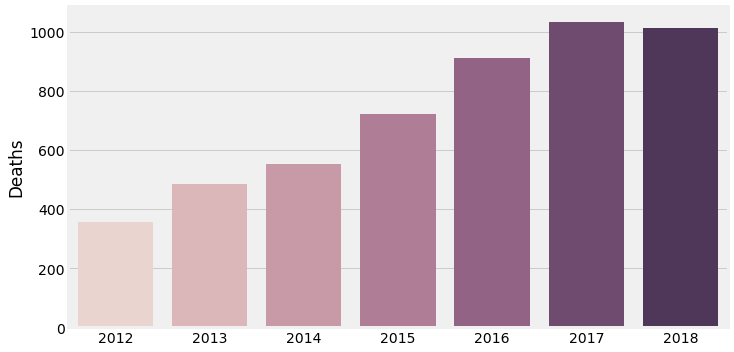

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

year = pd.to_datetime(df['Date']).dt.year.value_counts()
plt.figure(figsize = (10, 5))
with plt.style.context('fivethirtyeight'):
    graph1 = sns.barplot(x = year.index.astype('int64'), y = year.values.astype('int64'), 
                         palette=sns.cubehelix_palette(8))
plt.tight_layout()
plt.ylabel('Deaths')
plt.show()